In [ ]:
#Q1.Data cleaning including missing values, outliers and multi-collinearity. 
Missing Values: Impute missing values using median for numerical data and mode for categorical data. Drop features with excessive missingness.
Outliers: Identify outliers using box plots, then decide to cap or remove them based on their impact.
Multi-Collinearity: Analyze correlations, removing or combining highly correlated features.

In [3]:
import pandas as pd
df=pd.read_csv('Fraud.csv')
print(df.isnull().sum())
df = df.dropna()
df = df.drop_duplicates()
print(df.describe())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  5.826672e+06  5.826672e+06   5.826672e+06    5.826672e+06   
mean   2.179849e+02  1.812758e+05   8.435524e+05    8.655076e+05   
std    1.163072e+02  6.175381e+05   2.929243e+06    2.966026e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.400000e+02  1.355503e+04   0.000000e+00    0.000000e+00   
50%    2.290000e+02  7.570114e+04   1.376500e+04    0.000000e+00   
75%    3.100000e+02  2.100013e+05   1.071819e+05    1.445474e+05   
max    4.020000e+02  9.244552e+07   4.489219e+07    4.368662e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    5.826672e+06    5.826672e+06  5.826672e+06    5.826672e+06  
mean     1.093

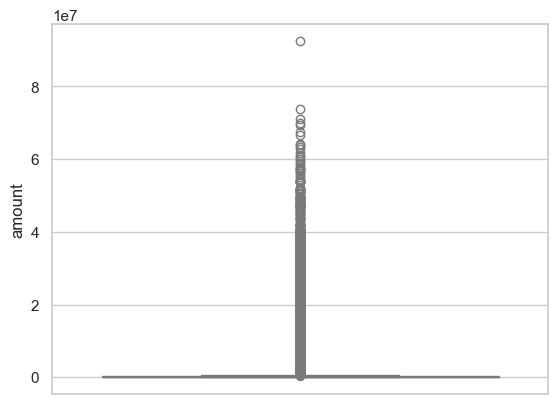

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df['amount'])
plt.show()


In [14]:
df_clean = df.dropna()
X_train, X_test, y_train, y_test = train_test_split(
    df_clean[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']], 
    df_clean['isFraud'], 
    test_size=0.2, 
    random_state=42
)


In [8]:
import pandas as pd
df=pd.read_csv('Fraud.csv')
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['amount'] < (Q1 - 1.5 * IQR)) | (df['amount'] > (Q3 + 1.5 * IQR)))]
df = df[~df['nameDest'].str.startswith('M')]
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  3.556560e+06  3.556560e+06   3.556560e+06    3.556560e+06   
mean   2.176876e+02  1.670751e+05   1.316633e+06    1.357408e+06   
std    1.161766e+02  1.192833e+05   3.630633e+06    3.670741e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.400000e+02  7.020725e+04   0.000000e+00    0.000000e+00   
50%    2.280000e+02  1.452187e+05   2.002200e+04    0.000000e+00   
75%    3.090000e+02  2.433988e+05   2.178242e+05    3.289359e+05   
max    4.020000e+02  5.046690e+05   4.381886e+07    4.368662e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    3.556560e+06    3.556559e+06  3.556559e+06       3556559.0  
mean     1.519249e+06    1.600674e+06  6.829635e-04             0.0  
std      3.549171e+06    3.570147e+06  2.612465e-02             0.0  
min      0.000000e+00    0.000000e+00  0.000000e+00             0.0  
25%      1.375830e+05    2.022550e+05

In [10]:
#Data Preparation 
from sklearn.model_selection import train_test_split
X = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
        'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud'] 
#80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
 # Q2. Describe your fraud detection model in elaboration. 
Utilizing Logistic regression for predicting binary output ( fraud and non fraud transaction).
Model Training: The model was trained on a large dataset of past transactions, which included both fraudulent and non-fraudulent examples. This training allows the model to learn the relationship between the input features and the outcome.


In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000) 

log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1] 


In [ ]:
# 3.How did you select variables to be included in the model?
Selected features based on domain knowledge and exploratory data analysis. Key variables included amount, oldbalanceOrg, and transaction types.


Confusion Matrix:
[[710787     39]
 [   344    142]]


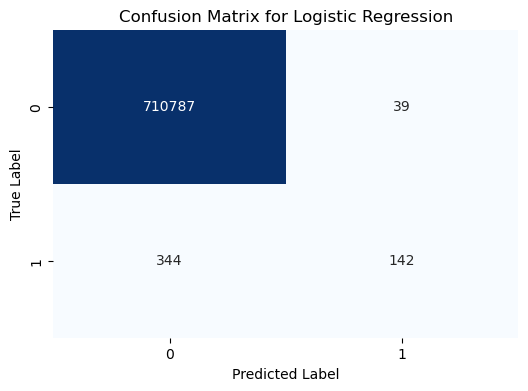

In [17]:
#NOW EVALUATING THE MODEL:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



cm = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(cm)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [18]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')


F1 Score: 0.43


In [ ]:
#   Q4.Demonstrate the performance of the model by using best set of tools. 
The model is evaluated by Confusion Matrix and F1-score
F1 SCORE:0.43 THAT MEANS MODERATE, IT CAN IDENTIFY FRAUDS TRANSACTIONS AT DECENT LEVEL.

Confusion matrix results:
Confusion Matrix:
[[710787     39]
 [   344    142]]
True Negatives (TN): 710,787 — These are the normal transactions that the model correctly identified as not being fraud.
False Positives (FP): 39 — These are normal transactions that the model mistakenly labeled as fraud. So, these transactions are actually fine, but the model raised a false alarm.
False Negatives (FN): 344 — These are fraudulent transactions that the model failed to identify. The model thought they were normal when they were actually scams.
True Positives (TP): 142 — These are the fraudulent transactions that the model correctly identified as scams.


In [ ]:
# Q5.What are the key factors that predict fraudulent customer?
High transaction amounts, significant balance changes, and certain transaction types (like CASH-OUT) were identified as key predictors.


In [ ]:
# Q6.Do these factors make sense? If yes, How? If not, How not? 
Yes, as high amounts and unusual account activity are strong indicators of potential fraud.These signs suggest that fraud could be happening.


In [ ]:

# Q7.What kind of prevention should be adopted while company update its infrastructure?
Watch Transactions in Real-Time: Check transactions as they occur to catch any suspicious activity right away.
Add Extra Security for Big Transactions: If someone tries to move a lot of money, we should ask them to verify their identity again, like entering a code sent to their phone.


In [ ]:
# Q8.Assuming these actions have been implemented, how would you determine if they work?
Run A/B Testing: Compare results by testing two different versions of our fraud detection approach to see which one performs better.
Look at Mistakes: Analyze the transactions we incorrectly flagged as fraud (false positives) and those we missed (false negatives) to understand where we can improve.